# check the reduction in accuracy when fewer particles are used for the RBF interpolation, MW-like case

In [1]:
import numpy as np
import h5py
import glob, os, re, sys
sys.path.append('../')

from GriddedData import GriddedDataset
import astro_helper as ah

import configparser
config = configparser.ConfigParser()
config.read('./config_test.ini')

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as patches
from matplotlib import rc
rc('axes', linewidth=1.5)
rc('axes', edgecolor='#3C3C3C')
plt.style.use('mpl_style_Jeffreson.mplstyle')
custom_colors = {
    'grey': '#3C3C3C',
    'turquoise': '#5E9F87'
}

# compute the error in the weight (also representative of error in force), and in the mid-plane indices

In [7]:
# baseline
gal = GriddedDataset(
    params = config["MW"],
    galaxy_type="MW",
    total_height=0.5, # kpc
    zbin_width_ptl=50., # so it's quicker for checking
    xymax=13., # kpc
    snapname="snap-DESPOTIC_500.hdf5",
    exclude_temp_above=float(config['MW'].get('EXCLUDE_TEMP')),
    exclude_avir_below=float(config['MW'].get('EXCLUDE_AVIR')),
    exclude_HII=True,
    realign_galaxy_to_gas=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [3]:
zidcs = gal.get_int_force_left_right_xy(PartType=6)[2]

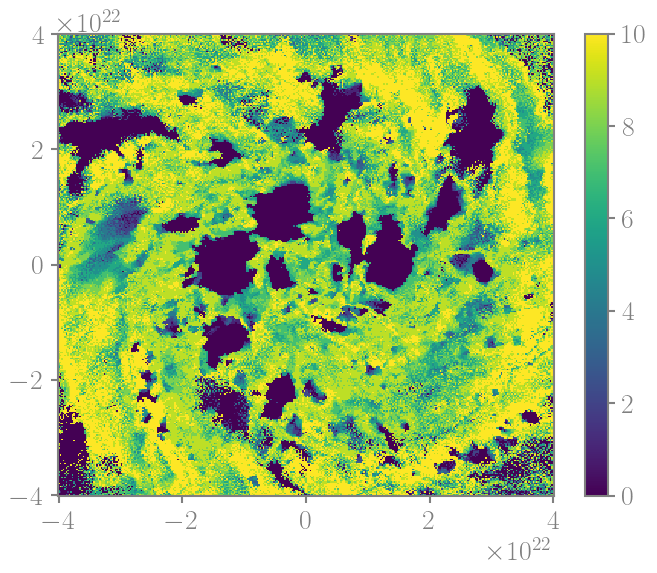

In [4]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, zidcs,
               cmap='viridis', shading='auto', vmin=0, vmax=10)
plt.colorbar()
plt.show()

In [5]:
weight = gal.get_weight_xy(PartType=6)

/tmp/ipykernel_702466/1370370394.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(weight/ah.kB_cgs), cmap='viridis', shading='auto')


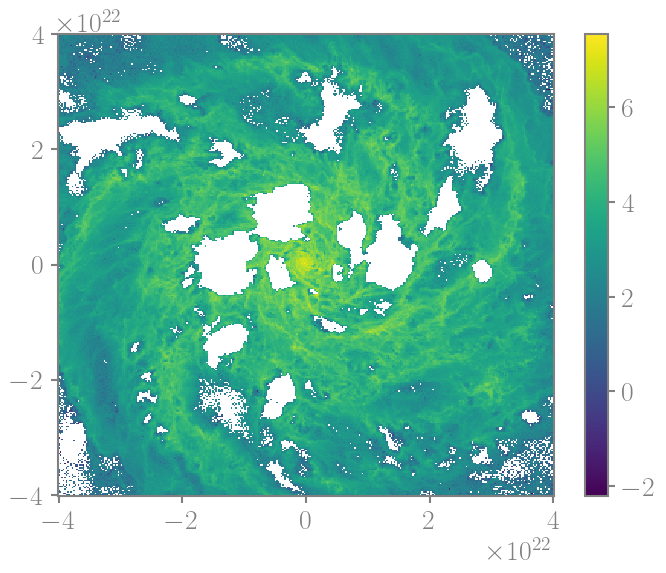

In [6]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(weight/ah.kB_cgs), cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

In [8]:
# gas particles only
gal = GriddedDataset(
    params = config["MW"],
    galaxy_type="MW",
    total_height=0.5, # kpc
    zbin_width_ptl=50., # so it's quicker for checking
    xymax=13., # kpc
    snapname="snap-DESPOTIC_500.hdf5",
    exclude_temp_above=float(config['MW'].get('EXCLUDE_TEMP')),
    exclude_avir_below=float(config['MW'].get('EXCLUDE_AVIR')),
    exclude_HII=True,
    realign_galaxy_to_gas=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [9]:
zidcs_gasonly = gal.get_int_force_left_right_xy(PartType=6, PartTypes=[0])[2]

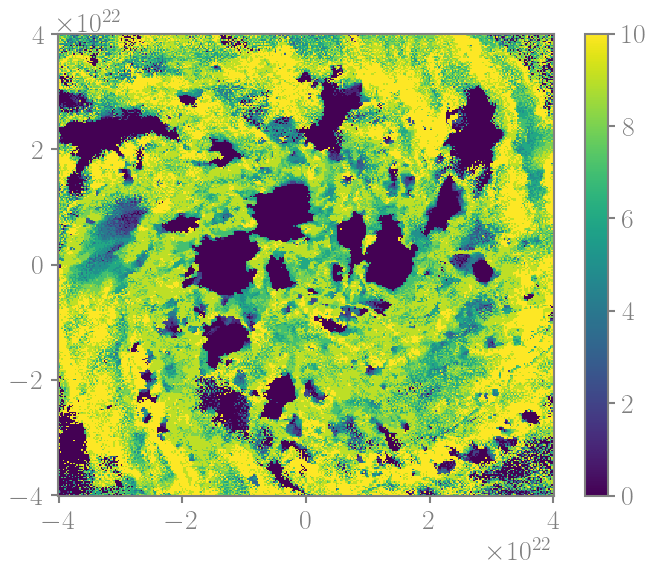

In [10]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, zidcs_gasonly,
               cmap='viridis', shading='auto', vmin=0, vmax=10)
plt.colorbar()
plt.show()

In [11]:
weight = gal.get_weight_xy(PartType=6)

/tmp/ipykernel_702466/1370370394.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(weight/ah.kB_cgs), cmap='viridis', shading='auto')


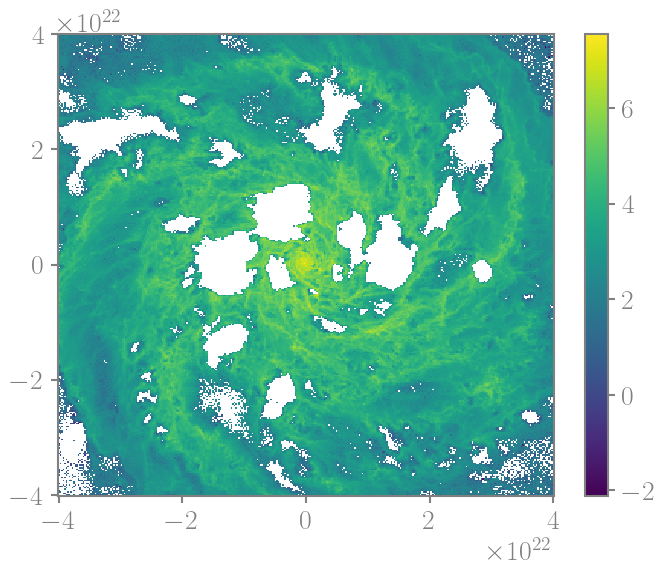

In [12]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(weight/ah.kB_cgs), cmap='viridis', shading='auto')
plt.colorbar()
plt.show()